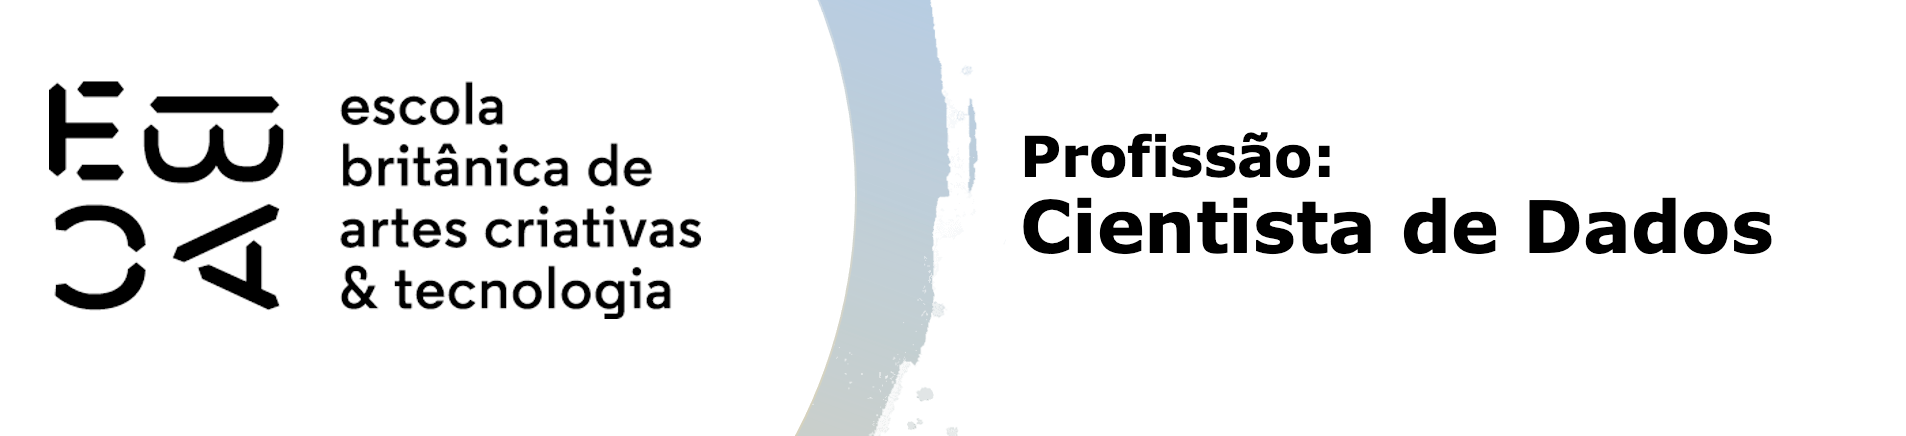

# Tarefa

Com base na tarefa realizada no módulo anterior, vamos fazer um diagnóstico do modelo.

Carregue a base ```previsao_de_renda2.csv```. Separe em uma base de treino e uma base de teste.

Vamos resgatar a melhor versão do modelod e previsão de renda que você fez para esta base. 

- Substitua missings pela média
- Rode novamente o modelo na base de treino (ou desenvolva-o caso não tenha o registro guardado). 

Este modelo deve prever a variável ```renda``` com base nas demais variáveis exceto ```data_ref``` e ```index```. Já vimos que a variável renda é melhor modelada com a transformação ```log()```, não se esqueça disso.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns

sns.set_theme()

%reload_ext watermark
%watermark -iv -v

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.15.0

matplotlib : 3.8.2
seaborn    : 0.13.0
pandas     : 2.1.4
statsmodels: 0.14.0
numpy      : 1.26.2



In [2]:
df = pd.read_csv('./Dados/previsao_de_renda_II.csv')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
1,2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2,2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
3,2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
4,2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


In [3]:
Analise = pd.DataFrame(df.dtypes, columns=['Dtypes']).assign(Contagem = df.count(),
                                                             Missing = df.isna().sum(),
                                                             Valores_Unicos = df.nunique())

Analise

,Dtypes,Contagem,Missing,Valores_Unicos
data_ref,object,750000,0,15
index,int64,750000,0,16650
sexo,object,750000,0,2
posse_de_veiculo,object,750000,0,2
posse_de_imovel,object,750000,0,2
qtd_filhos,int64,750000,0,8
tipo_renda,object,750000,0,5
educacao,object,750000,0,5
estado_civil,object,750000,0,5
tipo_residencia,object,750000,0,6


In [4]:
df.fillna(df['tempo_emprego'].mean(), inplace=True)
df['renda_log'] = np.log(df['renda'])
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,renda_log
0,2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14,9.318131
1,2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81,7.793508
2,2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66,9.528769
3,2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84,7.767196
4,2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78,6.673020


In [5]:
Analise = pd.DataFrame(df.dtypes, columns=['Dtypes']).assign(Contagem = df.count(),
                                                             Missing = df.isna().sum(),
                                                             Valores_Unicos = df.nunique())

Analise

,Dtypes,Contagem,Missing,Valores_Unicos
data_ref,object,750000,0,15
index,int64,750000,0,16650
sexo,object,750000,0,2
posse_de_veiculo,object,750000,0,2
posse_de_imovel,object,750000,0,2
qtd_filhos,int64,750000,0,8
tipo_renda,object,750000,0,5
educacao,object,750000,0,5
estado_civil,object,750000,0,5
tipo_residencia,object,750000,0,6


In [6]:
meses_test = df['data_ref'].unique()[-3:]

df_test = df[df['data_ref'].isin(meses_test)].copy()
df_train = df[~df['data_ref'].isin(meses_test)].copy()

print(f'\033[7;1mDatas df_test:\033[0m {df_test.data_ref.unique()}\n')

print(f'\033[7;1mDatas df_train:\033[0m {df_train.data_ref.unique()}')

Datas df_test: ['2016-01-01' '2016-02-01' '2016-03-01']

Datas df_train: ['2015-01-01' '2015-02-01' '2015-03-01' '2015-04-01' '2015-05-01'
 '2015-06-01' '2015-07-01' '2015-08-01' '2015-09-01' '2015-10-01'
 '2015-11-01' '2015-12-01']


## Verifique as suposições do modelo

Faça uma análise para avaliar as suposições básicas:

- Os resíduos desse modelo possuem distribuição Normal (ou algo próximo)?
- Verifique a independência dos resíduos
    - Faça um gráfico dos resíduos versus os valores preditos
    - Avalie se há padrões dos resíduos versus cada uma das variáveis do modelo
    - Avalie se o valor médio dos resíduos aparenta ter relação com o mês de referência
- Avalie se a variância da variável resposta parece ser conforme os valores previstos.

Você considera que as suposições estão atendidas? Há algum impacto em eventuais desvios?

In [7]:
res_1 = smf.ols('''renda_log ~ sexo
                             + posse_de_veiculo
                             + posse_de_imovel
                             + qtd_filhos
                             + tipo_renda
                             + educacao
                             + estado_civil
                             + tipo_residencia
                             + idade
                             + tempo_emprego
                             + qt_pessoas_residencia''', data=df_train).fit()

res_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              renda_log   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                 1.947e+04
Date:                Tue, 09 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:35:39   Log-Likelihood:            -7.9748e+05
No. Observations:              600000   AIC:                         1.595e+06
Df Residuals:                  599975   BIC:                         1.595e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            7.6405      0.048    160.310      0.000       7.547       7.734
sexo[T.M]                            0.1354      0.003     48.568      0.000       0.130       0.141
posse_de_veiculo[T.S]                0.0055      0.003      2.087      0.037       0.000       0.011
posse_de_imovel[T.S]                 0.1852      0.003     71.417      0.000       0.180       0.190
tipo_renda[T.Bolsista]              -0.2166      0.052     -4.129      0.000      -0.319      -0.114
tipo_renda[T.Empresário]             0.1452      0.003     48.527      0.000       0.139       0.151
tipo_renda[T.Pensionista]           -0.2974      0.004    -69.709      0.000      -0.306      -0.289
tipo_renda[T.Servidor público]       0.1333      0.004     30.253      0.000       0.125       0.142
educacao[T.Médio]                    0.0301      0.011      2.689      0.007       0.008       0.052
educacao[T.Pós graduação]            0.1542      0.038      4.043      0.000       0.079       0.229
educacao[T.Superior completo]        0.1233      0.011     10.896      0.000       0.101       0.146
educacao[T.Superior incompleto]      0.0434      0.013      3.424      0.001       0.019       0.068
estado_civil[T.Separado]             0.1793      0.023      7.792      0.000       0.134       0.224
estado_civil[T.Solteiro]             0.1614      0.023      7.151      0.000       0.117       0.206
estado_civil[T.União]                0.0097      0.005      2.161      0.031       0.001       0.019
estado_civil[T.Viúvo]                0.1634      0.023      7.027      0.000       0.118       0.209
tipo_residencia[T.Casa]             -0.0881      0.010     -8.651      0.000      -0.108      -0.068
tipo_residencia[T.Com os pais]      -0.0557      0.012     -4.823      0.000      -0.078      -0.033
tipo_residencia[T.Comunitário]      -0.1404      0.021     -6.835      0.000      -0.181      -0.100
tipo_residencia[T.Estúdio]          -0.1408      0.017     -8.203      0.000      -0.174      -0.107
tipo_residencia[T.Governamental]    -0.0942      0.012     -7.773      0.000      -0.118      -0.070
qtd_filhos                          -0.1498      0.022     -6.668      0.000      -0.194      -0.106
idade                                0.0042      0.000     26.893      0.000       0.004       0.004
tempo_emprego                        0.1290      0.000    619.711      0.000       0.129       0.129
qt_pessoas_residencia                0.1554      0.022      6.929      0.000       0.111       0.199
==============================================================================
Omnibus:                     1088.041   Durbin-Watson:                   1.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              957.929
Skew:             

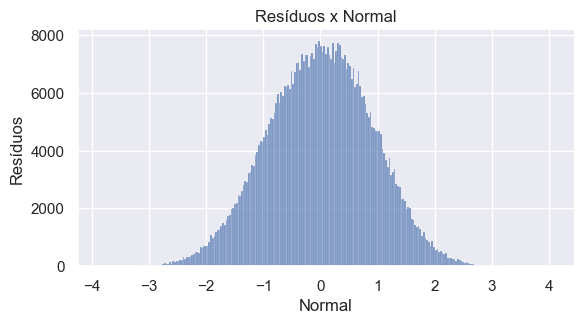

In [8]:
# Os resíduos desse modelo possuem distribuição Normal (ou algo próximo)?
graf_1 = sns.displot(res_1.resid, height=3, aspect=2).set(xlabel='Normal', ylabel='Resíduos', title='Resíduos x Normal')

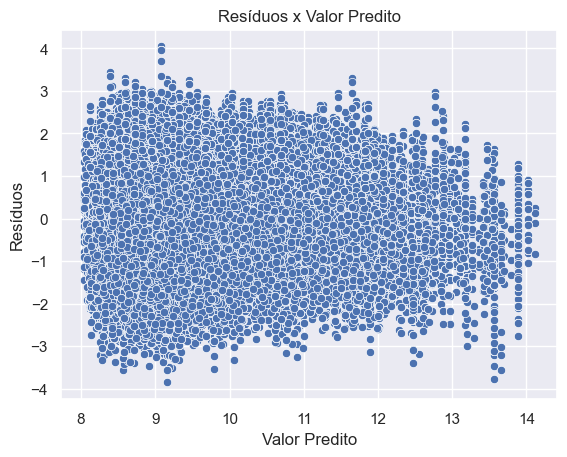

In [9]:
# Faça um gráfico dos resíduos versus os valores preditos
graf_2 = sns.scatterplot(x = res_1.predict(), y = res_1.resid).set(xlabel='Valor Predito', ylabel= 'Resíduos', title='Resíduos x Valor Predito')

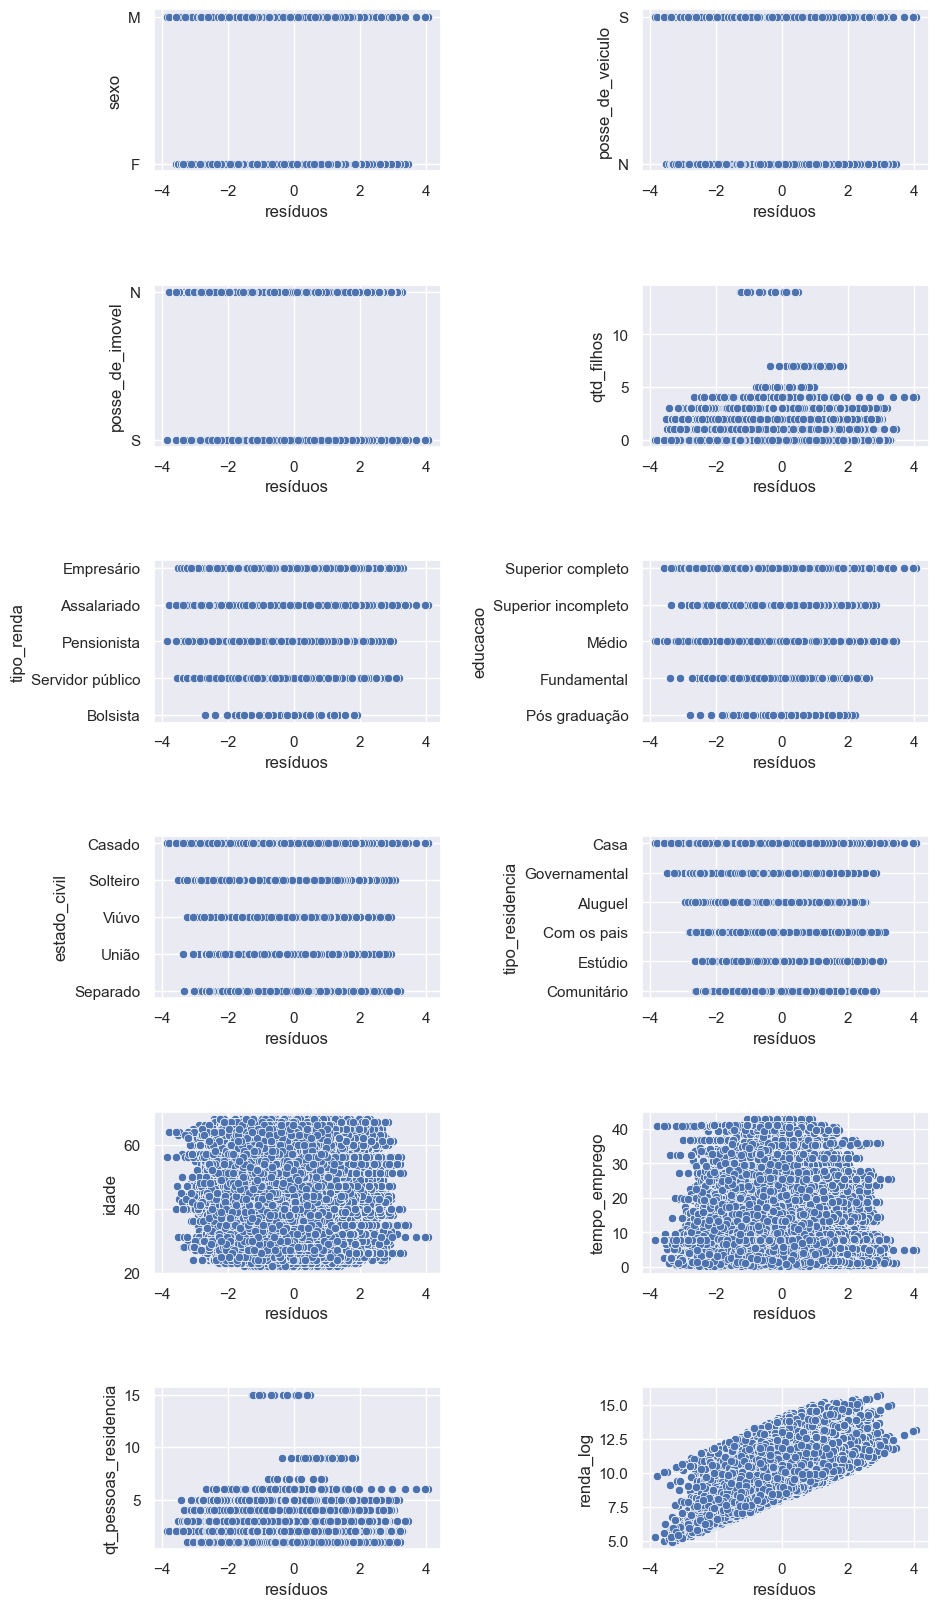

In [15]:
# Avalie se há padrões dos resíduos versus cada uma das variáveis do modelo
fix, ax = plt.subplots(6, 2, figsize=(10,20))
plt.subplots_adjust(wspace=.7, hspace=.7)

sns.scatterplot(x=res_1.resid, y='sexo'                 , data=df_train, ax=ax[0,0])
sns.scatterplot(x=res_1.resid, y='posse_de_veiculo'     , data=df_train, ax=ax[0,1])
sns.scatterplot(x=res_1.resid, y='posse_de_imovel'      , data=df_train, ax=ax[1,0])
sns.scatterplot(x=res_1.resid, y='qtd_filhos'           , data=df_train, ax=ax[1,1])
sns.scatterplot(x=res_1.resid, y='tipo_renda'           , data=df_train, ax=ax[2,0])
sns.scatterplot(x=res_1.resid, y='educacao'             , data=df_train, ax=ax[2,1])
sns.scatterplot(x=res_1.resid, y='estado_civil'         , data=df_train, ax=ax[3,0])
sns.scatterplot(x=res_1.resid, y='tipo_residencia'      , data=df_train, ax=ax[3,1])
sns.scatterplot(x=res_1.resid, y='idade'                , data=df_train, ax=ax[4,0])
sns.scatterplot(x=res_1.resid, y='tempo_emprego'        , data=df_train, ax=ax[4,1])
sns.scatterplot(x=res_1.resid, y='qt_pessoas_residencia', data=df_train, ax=ax[5,0])
sns.scatterplot(x=res_1.resid, y='renda_log'            , data=df_train, ax=ax[5,1])

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        ax[i,j].set(xlabel='resíduos')    

[Text(0.5, 0, 'resíduos')]

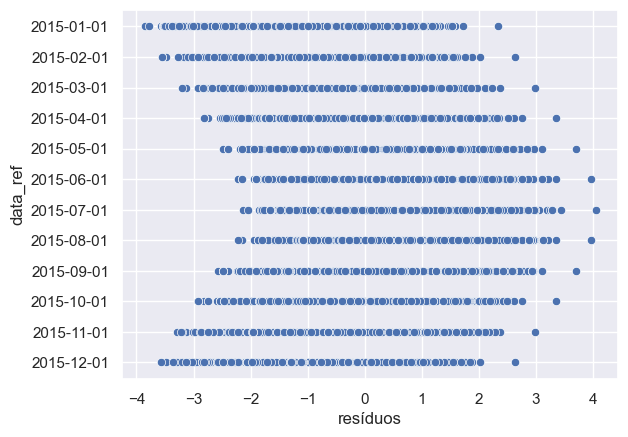

In [17]:
# Avalie se o valor médio dos resíduos aparenta ter relação com o mês de referência

sns.scatterplot(x=res_1.resid, y='data_ref', data=df_train).set(xlabel='resíduos')

## Outliers

Avalie os *studentized residuals*, verifique se há pontos que parecem ser discrepantes.

Avalie se há pontos influentes.

## Multicolinearidade

Avalie se há questões relacionadas a multicolinearidade através de pelo menos:

- Matriz de correlação de Spearman
- VIF

## Ajustes

Faça os ajustes que julgar necessários no modelo e compare as métricas de desempenho do modelo original e ajustado na base de testes.